In [210]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# 通用函数

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
                         np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),)
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
#画出除了决策边界以外的两条跟支持向量相关的直线
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
                         np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(1, -1),)
    x_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(x_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')
    
    
def get_polynomial_svc(degree, C=1.0, multi_class='ovr'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('linear_svc', LinearSVC(C=C, multi_class=multi_class))
    ])    
    
    
def get_standard_linear_svr(degree, epsilon=0.1, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scale', StandardScaler()),
        ('linear_svr', LinearSVR(epsilon=epsilon, C=C))
    ])

# SVM（鸢尾花二分类）

In [211]:
iris = datasets.load_iris()

x = iris.data
y = iris.target
x = x[y<2, :2]
y = y[y<2]

standard_scaler = StandardScaler()
standard_scaler.fit(x)
x_standard = standard_scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_standard, y, random_state=100)


In [212]:
svc = LinearSVC(C=1)
svc.fit(x_train, y_train)

LinearSVC(C=1)

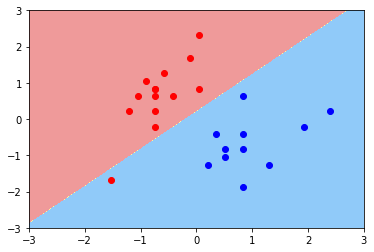

In [213]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], color='red')
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='blue')
plt.show()

In [214]:
svc.score(x_test,y_test)

0.96

# SVM（鸢尾花三分类）

In [215]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

x=x[:, 2:4]


standard_scaler = StandardScaler()
standard_scaler.fit(x)
x_standard = standard_scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_standard, y, random_state=100)


In [216]:
svc = get_polynomial_svc(degree=1, C=1, multi_class='ovr')
svc.fit(x_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('std_scale', StandardScaler()),
                ('linear_svc', LinearSVC(C=1))])

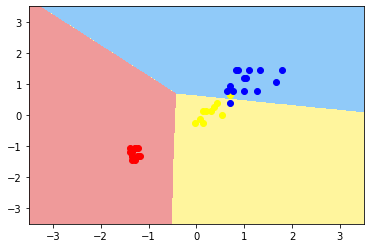

In [217]:
plot_decision_boundary(svc, axis=[-3.5, 3.5, -3.5, 3.5])
plt.scatter(x_test[y_test==0, 0], x_test[y_test==0, 1], color='red')
plt.scatter(x_test[y_test==1, 0], x_test[y_test==1, 1], color='yellow')
plt.scatter(x_test[y_test==2, 0], x_test[y_test==2, 1], color='blue')
plt.show()

In [218]:
svc.score(x_test,y_test)

0.9473684210526315

# SVM（波士顿房价回归）

In [219]:
boston = datasets.load_boston()
x = boston.data
y = boston.target


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

svr = get_standard_linear_svr(degree=4, C=1, epsilon=0)
svr.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('std_scale', StandardScaler()),
                ('linear_svr', LinearSVR(C=1, epsilon=0))])

In [220]:
svr.score(x_test,y_test)

0.858701136470805